In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

In [3]:
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [7]:
train = pd.read_csv('C:\\Users\PAVITHRA J\\Downloads\\train.csv')
test = pd.read_csv('C:\\Users\PAVITHRA J\\Downloads\\test.csv')

In [9]:
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
7555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
train=train.drop(train.index[6480:])
train.tail()

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
6475,6475.0,31/12/17,Athens,37.96245,23.68708,665871.0,shop_3,orange-power,plastic,1.5lt,1.02,33201.0
6476,6476.0,31/12/17,Larisa,39.63689,22.41761,144302.0,shop_5,orange-power,can,330ml,0.47,46971.0
6477,6477.0,31/12/17,Patra,38.24444,21.73444,168501.0,shop_6,adult-cola,glass,500ml,1.02,47708.0
6478,6478.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,gazoza,plastic,1.5lt,1.34,27115.0
6479,6479.0,31/12/17,Thessaloniki,40.64361,22.93086,353001.0,shop_4,adult-cola,glass,500ml,1.16,30413.0


In [12]:
pd.DataFrame(train.groupby(['brand', 'container'], axis =0, as_index=True).count()['id'])

id
brand        container     
adult-cola   can        430
             glass      432
             plastic    432
gazoza       can        431
             glass      429
             plastic    431
kinder-cola  can        431
             glass      431
             plastic    432
lemon-boost  can        431
             glass      432
             plastic    431
orange-power can        430
             glass      430
             plastic    431

In [13]:
gazoza_train = train[train['brand'] == 'gazoza'].reset_index(drop=True)

# Fill in the missing contiainer types
gazoza_train.at[340, 'container'] = 'can'
gazoza_train.at[798, 'container'] = 'glass'
gazoza_train.at[984, 'container'] = 'glass'
gazoza_train.at[1214, 'container'] = 'plastic'
gazoza_train.at[1229, 'container'] = 'glass'
# Fill in the missing capacity types
gazoza_train.at[368, 'capacity'] = '1.5lt'
gazoza_train.at[648, 'capacity'] = '500ml'
gazoza_train.at[962, 'capacity'] = '500ml'
# Choose features
# gazoza_train.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_train['date'] = pd.to_datetime(gazoza_train['date'])
# Remove the sufix of the values of the capacity column, Change into numerics
gazoza_train['capacity'] = gazoza_train['capacity'].map(lambda x: str(x)[:-2])
gazoza_train['capacity'] = pd.to_numeric(gazoza_train['capacity'])

#----------------------

gazoza_test = test[test['brand'] == 'gazoza'].reset_index(drop=True)
# Fill in the missing capacity types
gazoza_test.at[208, 'capacity'] = '330ml'
gazoza_test.at[209, 'capacity'] = '500ml'
# Choose features
# gazoza_test.drop(['id','shop','long','brand','container'], axis=1, inplace=True)
gazoza_test['date'] = pd.to_datetime(gazoza_test['date'])
# Remove the sufix of the values of the capacity column, Change into numerics
gazoza_test['capacity'] = gazoza_test['capacity'].map(lambda x: str(x)[:-2])
gazoza_test['capacity'] = pd.to_numeric(gazoza_test['capacity'])

# -----------------------
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        213 non-null    float64       
 4   long       211 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


In [14]:
# Fill in the missing values for lat column of training set
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.97945 if (row['shop'] == 'shop_1') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 35.32787 if (row['shop'] == 'shop_2') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)
gazoza_train['lat'] = gazoza_train.apply(lambda row: 38.24444 if (row['shop'] == 'shop_6') else row['lat'],axis=1)

# Fill in the missing values for long column of training set
gazoza_train['long'] = gazoza_train.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 22.93086 if (row['shop'] == 'shop_4') else row['long'],axis=1)
gazoza_train['long'] = gazoza_train.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)

# Fill in the missing values for lat column of testing set
gazoza_test['lat'] = gazoza_test.apply(lambda row: 37.96245 if (row['shop'] == 'shop_3') else row['lat'],axis=1)
gazoza_test['lat'] = gazoza_test.apply(lambda row: 39.63689 if (row['shop'] == 'shop_5') else row['lat'],axis=1)


# Fill in the missing values for long column of testing set
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.68708 if (row['shop'] == 'shop_3') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 21.73444 if (row['shop'] == 'shop_6') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 25.14341 if (row['shop'] == 'shop_2') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 23.71622 if (row['shop'] == 'shop_1') else row['long'],axis=1)
gazoza_test['long'] = gazoza_test.apply(lambda row: 22.41761 if (row['shop'] == 'shop_5') else row['long'],axis=1)

In [15]:
gazoza_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1296 non-null   float64       
 1   date       1296 non-null   datetime64[ns]
 2   city       1296 non-null   object        
 3   lat        1296 non-null   float64       
 4   long       1296 non-null   float64       
 5   pop        1296 non-null   float64       
 6   shop       1296 non-null   object        
 7   brand      1296 non-null   object        
 8   container  1296 non-null   object        
 9   capacity   1296 non-null   float64       
 10  price      1296 non-null   float64       
 11  quantity   1296 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 121.6+ KB


In [16]:
gazoza_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         216 non-null    int64         
 1   date       216 non-null    datetime64[ns]
 2   city       216 non-null    object        
 3   lat        216 non-null    float64       
 4   long       216 non-null    float64       
 5   pop        216 non-null    int64         
 6   shop       216 non-null    object        
 7   brand      216 non-null    object        
 8   container  216 non-null    object        
 9   capacity   216 non-null    float64       
 10  price      216 non-null    float64       
 11  quantity   216 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(4)
memory usage: 20.4+ KB


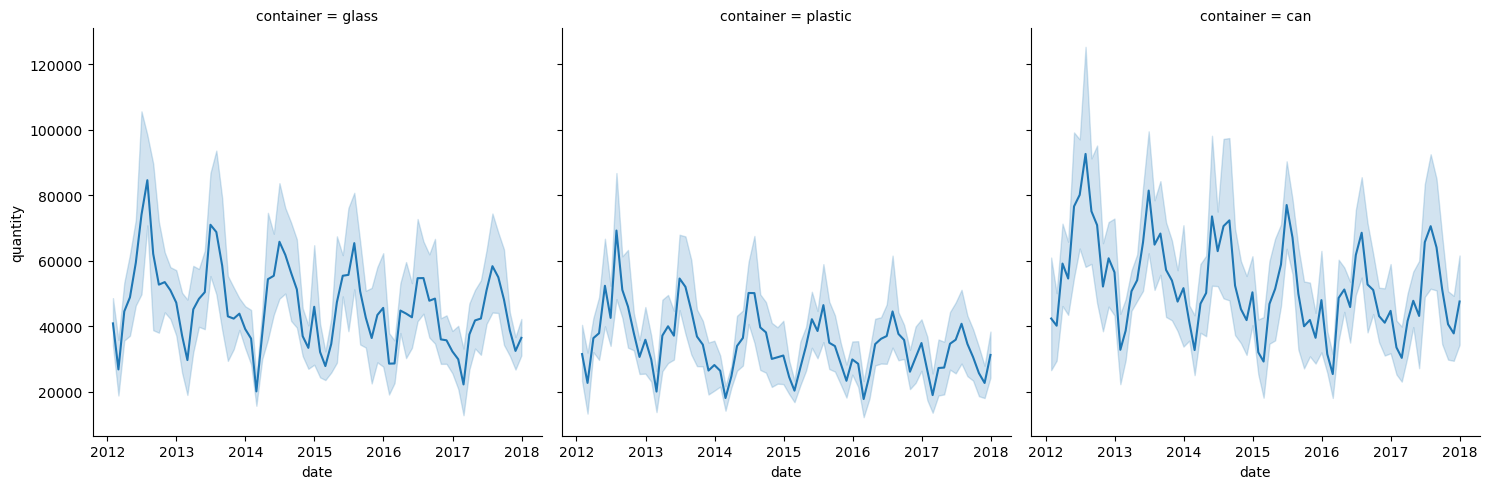

In [17]:
sns.relplot(data=gazoza_train, x='date', y='quantity', col = 'container', kind='line')

In [18]:
gazoza_train[(gazoza_train['city'] == 'Athens') & (gazoza_train['capacity'] == 1.5)]

,id,date,city,lat,long,pop,shop,brand,container,capacity,price,quantity
9,55.0,2012-01-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,1.16,14480.0
17,86.0,2012-01-31,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,0.85,26884.0
19,97.0,2012-02-29,Athens,37.97945,23.71622,672130.0,shop_1,gazoza,plastic,1.5,1.35,7946.0
26,143.0,2012-02-29,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.98,14749.0
46,235.0,2012-03-31,Athens,37.96245,23.68708,672130.0,shop_3,gazoza,plastic,1.5,0.45,33115.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1258,6294.0,2017-10-31,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.45,14238.0
1261,6309.0,2017-11-30,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,19973.0
1270,6356.0,2017-11-30,Athens,37.96245,23.68708,665871.0,shop_3,gazoza,plastic,1.5,1.40,15525.0
1279,6399.0,2017-12-31,Athens,37.97945,23.71622,665871.0,shop_1,gazoza,plastic,1.5,1.31,22911.0


In [19]:
qty = pd.DataFrame(gazoza_train.groupby(['date'], axis =0, as_index=True).sum()['quantity'])

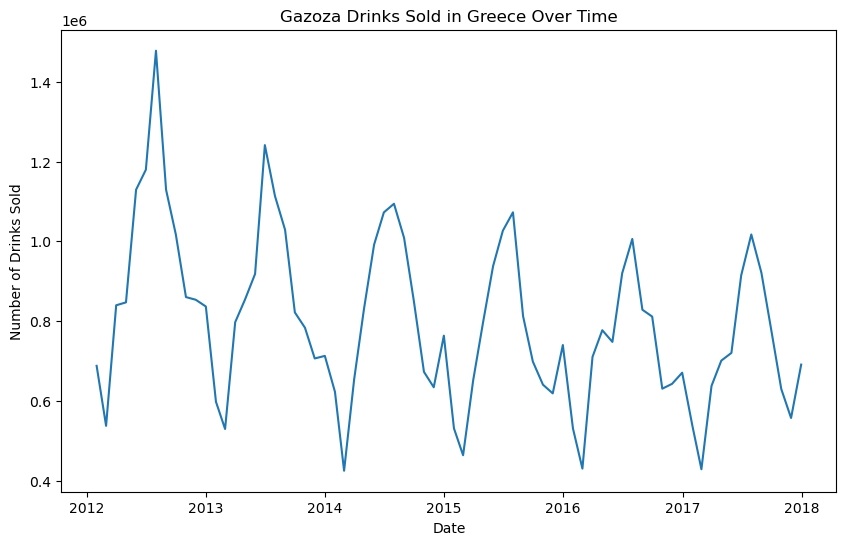

In [20]:
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.title("Gazoza Drinks Sold in Greece Over Time")
plt.plot(qty)

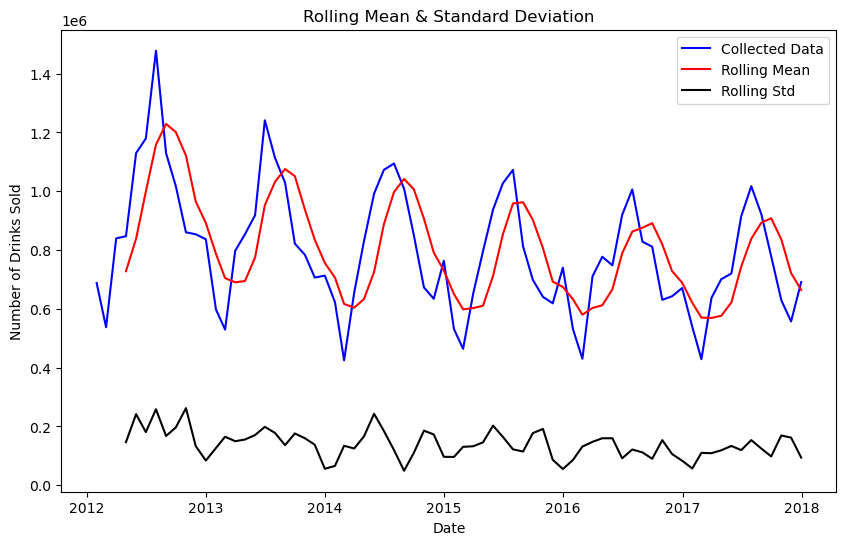

In [21]:
rolmean = qty.rolling(window = 4).mean()
rolstd = qty.rolling(window = 4).std()

# Plot rolling statistics:
orig = plt.plot(qty, color='blue', label='Collected Data')
meanR = plt.plot(rolmean, color='red', label='Rolling Mean')
stdR = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

In [22]:
# Perform Dickey-Fuller Test

from statsmodels.tsa.stattools import adfuller

def dickeyfuller(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries[:], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [39]:
dickeyfuller(qty)

Results of Dickey-Fuller Test:
Test Statistic                 -3.282210
p-value                         0.015693
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


Text(0.5, 1.0, 'Log Scale Gazoza Drinks Sold in Greece Over Time')

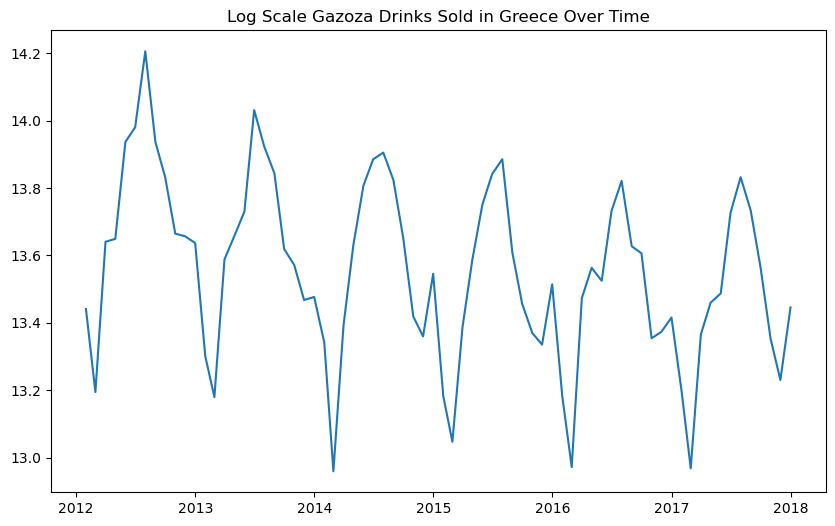

In [40]:
qty_log = np.log(qty)
plt.plot(qty_log)
plt.title("Log Scale Gazoza Drinks Sold in Greece Over Time")

In [41]:
dickeyfuller(qty_log)

Results of Dickey-Fuller Test:
Test Statistic                 -2.783541
p-value                         0.060664
#Lags Used                     12.000000
Number of Observations Used    59.000000
Critical Value (1%)            -3.546395
Critical Value (5%)            -2.911939
Critical Value (10%)           -2.593652
dtype: float64


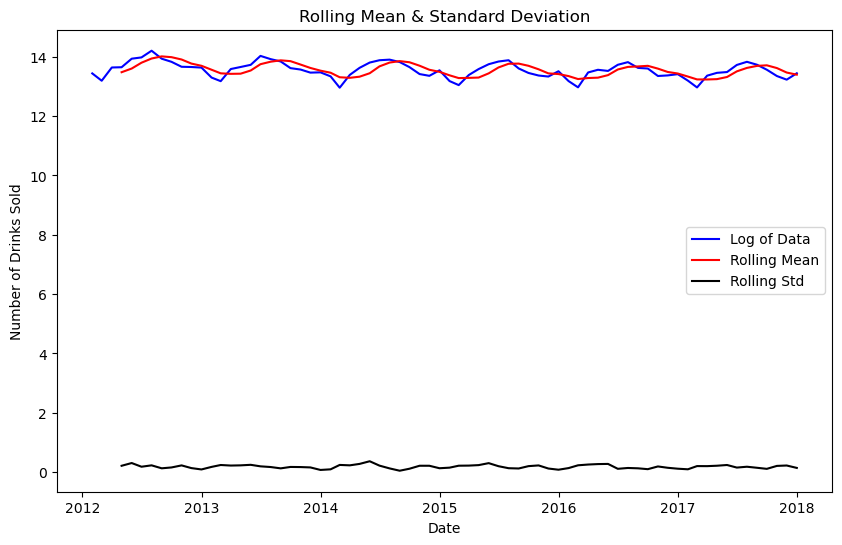

In [42]:
rolmean_log = qty_log.rolling(window = 4).mean()
rolstd_log = qty_log.rolling(window = 4).std()

# Plot rolling statistics:
orig_log = plt.plot(qty_log, color='blue', label='Log of Data')
meanR_log = plt.plot(rolmean_log, color='red', label='Rolling Mean')
stdR_log = plt.plot(rolstd_log, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title("Rolling Mean & Standard Deviation")
plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.show(block = False)

Results of Dickey-Fuller Test:
Test Statistic                 -3.949897
p-value                         0.001697
#Lags Used                     11.000000
Number of Observations Used    48.000000
Critical Value (1%)            -3.574589
Critical Value (5%)            -2.923954
Critical Value (10%)           -2.600039
dtype: float64


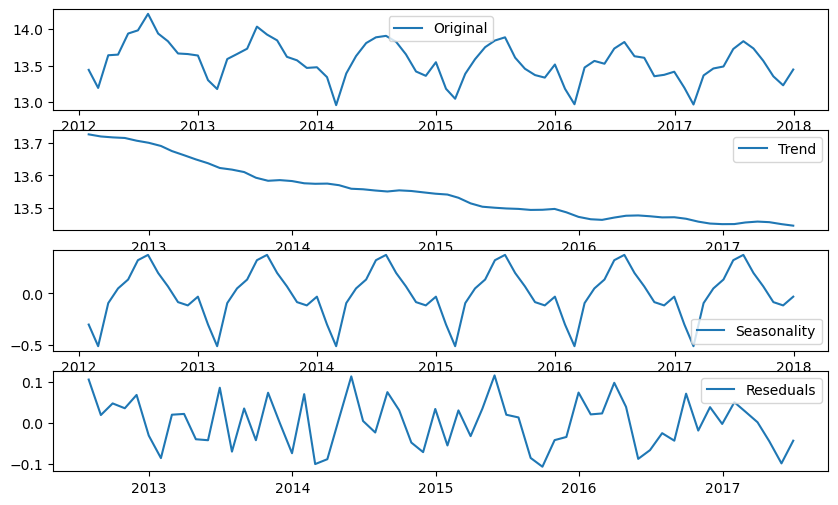

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose
desomposition = seasonal_decompose(qty_log)

trend = desomposition.trend
seasonal = desomposition.seasonal
resedual = desomposition.resid

plt.subplot(411)
plt.plot(qty_log, label="Original")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label ='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label ='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(resedual, label ='Reseduals')
plt.legend(loc='best')

decomposedLogData = resedual
decomposedLogData.dropna(inplace = True)
dickeyfuller(decomposedLogData)

Text(0.5, 1.0, 'Shift values to use in forecasting')

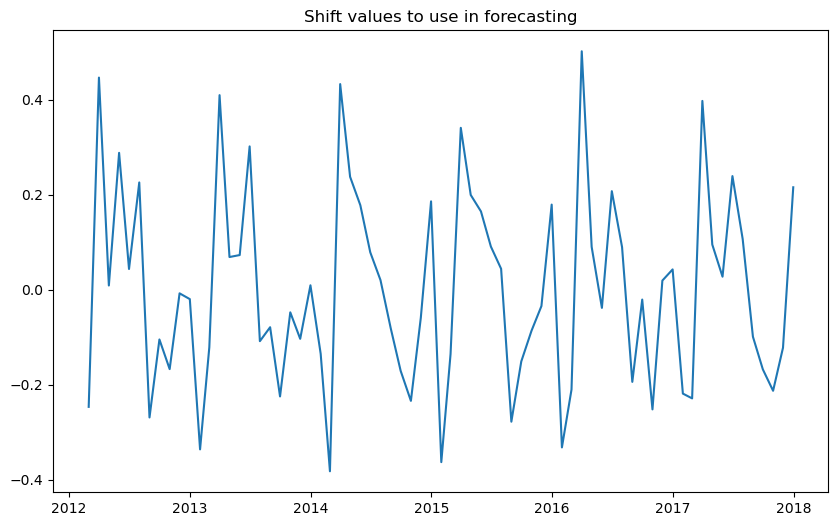

In [44]:
dataLogDiffShifting = qty_log - qty_log.shift()
plt.plot(dataLogDiffShifting)
plt.title("Shift values to use in forecasting")

In [45]:
dataLogDiffShifting.dropna(inplace=True)

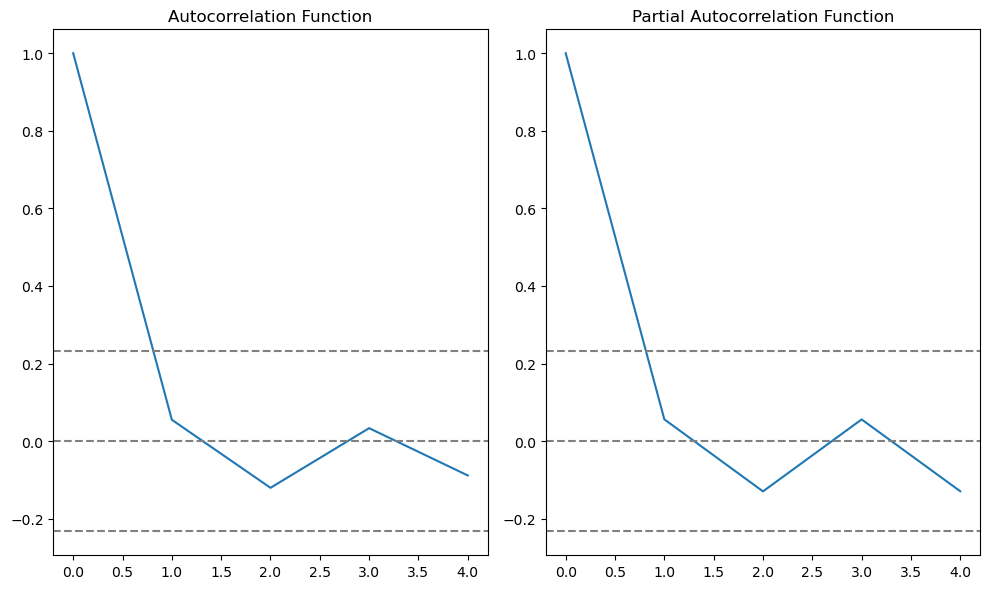

In [46]:
#ACF  and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(dataLogDiffShifting, nlags = 4)
lag_pacf = pacf(dataLogDiffShifting, nlags = 4, method = 'ols') # ordinary least square

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle = '--', color ='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.axhline(y=1.96/np.sqrt(len(dataLogDiffShifting)), linestyle = '--', color ='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

Plotting AR Model


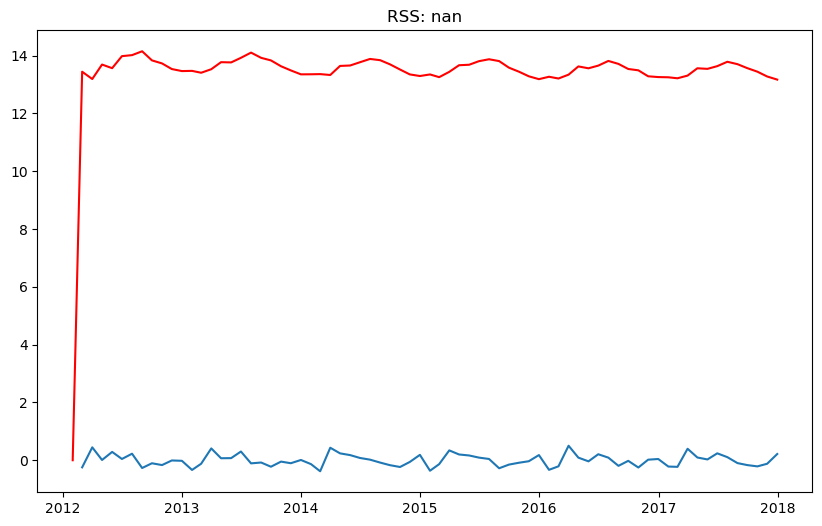

In [78]:
from statsmodels.tsa.arima.model import ARIMA

# AR Model
model = ARIMA(qty_log, order=(5, 1, 2))  # P, d, Q values
results_AR = model.fit()
plt.plot(dataLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f' % sum((results_AR.fittedvalues - dataLogDiffShifting['quantity']) ** 2))
print('Plotting AR Model')


In [79]:
predictions_ARIMA_diff = pd.Series(results_AR.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

date
2012-01-31     0.000000
2012-02-29    13.441298
2012-03-31    13.189305
2012-04-30    13.689561
2012-05-31    13.564145
dtype: float64


In [80]:
# Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

date
2012-01-31     0.000000
2012-02-29    13.441298
2012-03-31    26.630604
2012-04-30    40.320164
2012-05-31    53.884309
dtype: float64


In [85]:
predictions_ARIMA_log = pd.Series(qty_log['quantity'], index=qty_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

date
2012-01-31    13.441298
2012-02-29    26.635906
2012-03-31    40.271332
2012-04-30    53.969534
2012-05-31    67.821477
dtype: float64

C:\Users\PAVITHRA J\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0, 0.5, 'Quantity Sold')

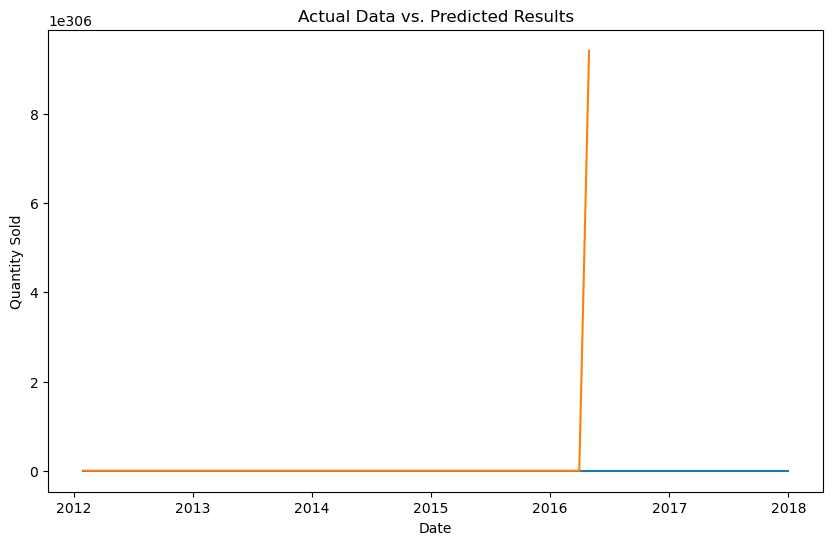

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(qty)
plt.plot(predictions_ARIMA)
plt.title("Actual Data vs. Predicted Results")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")

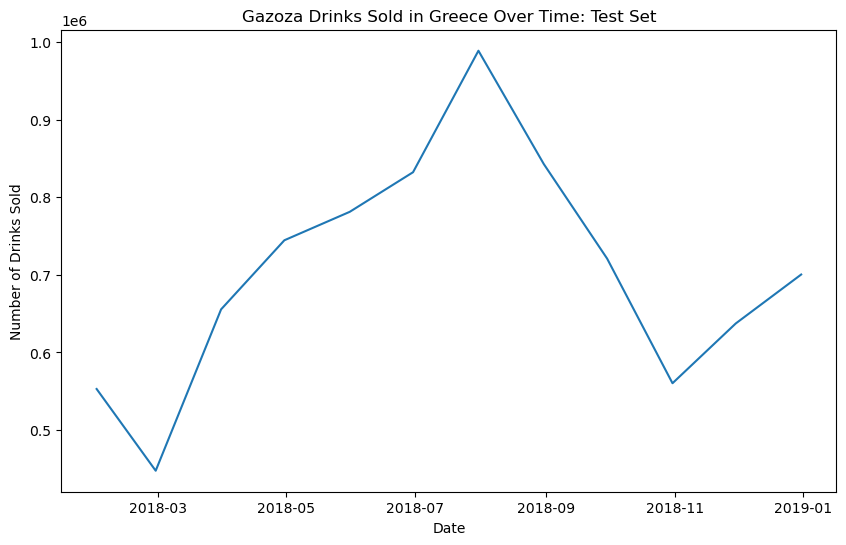

In [87]:
qty_test = pd.DataFrame(gazoza_test.groupby(['date'], axis =0, as_index=True).sum()['quantity'])

# Plot Graph of Gazoza sales ove the years

plt.xlabel("Date")
plt.ylabel("Number of Drinks Sold")
plt.title("Gazoza Drinks Sold in Greece Over Time: Test Set")
plt.plot(qty_test)

C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

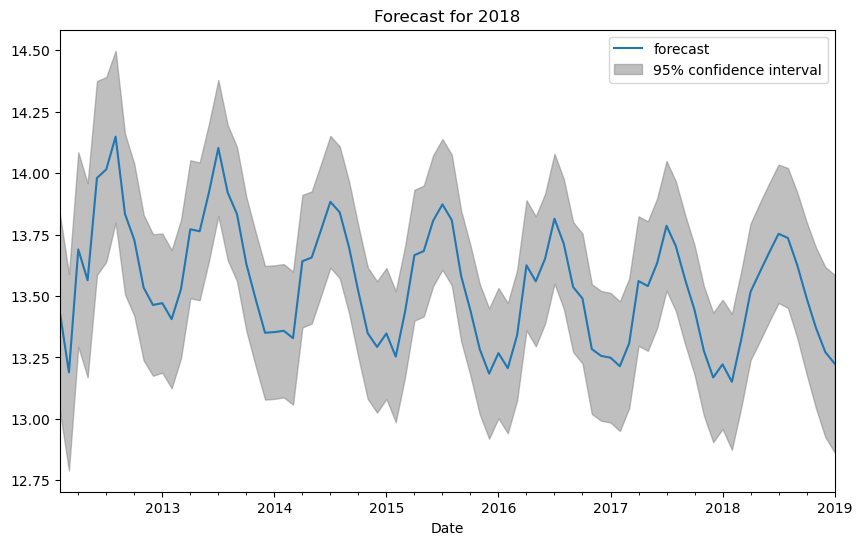

In [89]:
from statsmodels.graphics.tsaplots import plot_predict

# AR Model
model = ARIMA(qty_log, order=(5, 1, 2))  # P, d, Q values
results_AR = model.fit()

# Plot forecast
plot_predict(results_AR, start=1, end=84)
plt.title("Forecast for 2018")
plt.xlabel("Date")
plt.show()


In [106]:
results_AR.plot_predict(1,84)
plt.title("Forecast for 2018")
plt.xlabel("Date")

AttributeError: 'ARIMAResults' object has no attribute 'plot_predict'

C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\PAVITHRA J\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invert

TypeError: cannot add DatetimeArray and Timestamp

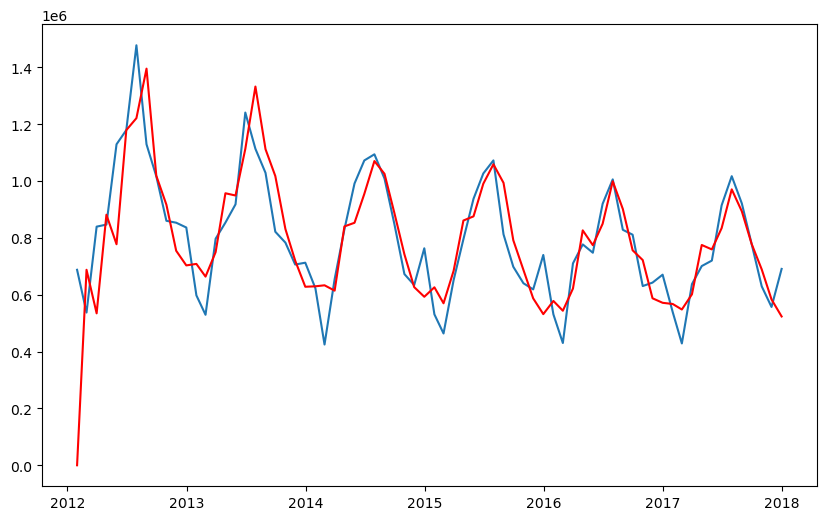

In [92]:
# AR Model
model = ARIMA(qty_log, order=(5, 1, 2))  # P, d, Q values
results_AR = model.fit()

# Forecast
# Forecast
forecast_values = results_AR.forecast(steps=84)  # Forecasting 84 steps ahead

# Plot forecast
plt.plot(np.exp(qty_log), label='Original Data')
plt.plot(np.exp(results_AR.fittedvalues), color='red', label='Fitted Values')
plt.plot(np.exp(pd.Series(forecast_values, index=qty_log.index[-1] + pd.date_range(start='1/1/2024', periods=84, freq='M'))), color='green', label='Forecast')
plt.title("Forecast for 2018")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
plt.legend()
plt.show()




In [93]:
forecast_18 = pd.Series(results_AR.forecast(steps=12)[0])

In [95]:
# Make sure the length of forecast_18 index matches the length of qty_test index
forecast_18.index = qty_test.index[:len(forecast_18)]


In [100]:
# Generate forecasted values and optionally confidence intervals
forecast_results = results_AR.forecast(steps=84)  # By default, no confidence interval is returned

# Extract forecasted values and confidence intervals if available
if isinstance(forecast_results, tuple):
    forecast_values = forecast_results[0]
    forecast_conf_int = forecast_results[1]
else:
    # Handle case when only forecasted values are returned
    forecast_values = forecast_results
    forecast_conf_int = None

# Extract lower and upper confidence bounds if available
if forecast_conf_int is not None:
    low = forecast_conf_int[:, 0]
    high = forecast_conf_int[:, 1]
else:
    # Handle case when confidence intervals are not available
    low = None
    high = None


NameError: name 'low_bound' is not defined

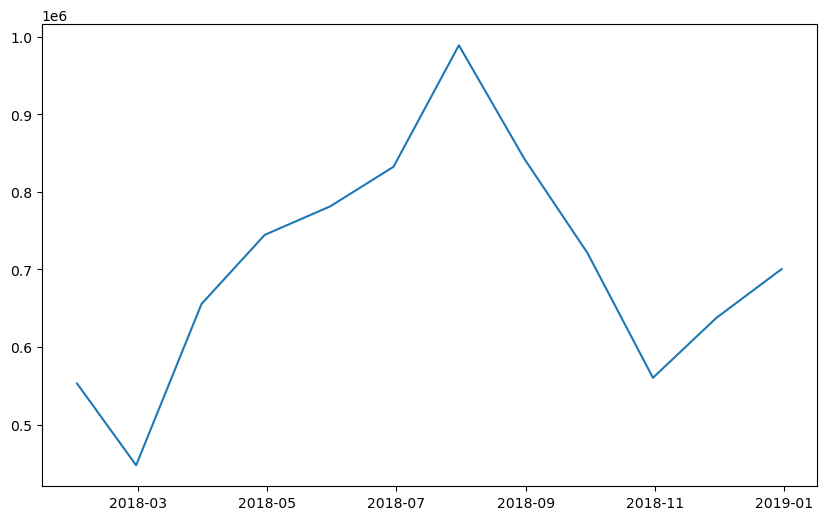

In [105]:
plt.plot(qty_test, label = "2018 Test Data")
plt.plot(np.exp(forecast_18), label = "2018 Forecast")

plt.plot(np.exp(low_bound), linestyle = '--', color ='gray', label = '95% Confidence Interval')
plt.plot(np.exp(high_bound), linestyle = '--', color ='gray')

plt.legend(loc='best')
plt.title("2018 Forecast vs 2018 Test")
plt.xlabel("Date")
plt.ylabel("Quantity Sold")
Text(0, 0.5, 'Quantity Sold')

NN_pred = [27995.53125, 23516.5625, 43323.83203125, 29774.40234375, 33537.34765625, 70139.9453125, 43992.3203125, 52559.10546875, 28519.216796875, 41201.68359375, 37230.76171875, 28008.6328125, 15068.306640625, 53544.8515625, 27877.029296875, 55124.234375, 46199.5234375, 37970.35546875, 20397.423828125, 17169.49609375, 24014.318359375, 30734.091796875, 19227.01953125, 35711.67578125, 43398.37109375, 24988.18359375, 49291.14453125, 33905.75390625, 21092.140625, 18523.40625, 8996.20703125, 32146.455078125, 13686.7841796875, 14233.4130859375, 27304.142578125, 46164.00390625, 31509.890625, 26958.54296875, 38854.87109375, 38880.48828125, 35190.87109375, 49890.19140625, 71913.0625, 40483.1875, 34886.7421875, 19460.2265625, 37590.765625, 31629.5234375, 38371.40234375, 34561.57421875, 55011.75, 58391.1875, 23737.64453125, 45129.44140625, 25710.375, 33765.53515625, 34778.96875, 31293.46484375, 47564.203125, 37007.83203125, 33198.61328125, 31615.2265625, 30672.3203125, 16498.169921875, 25355.603515625, 38380.02734375, 19921.14453125, 15839.169921875, 52092.11328125, 52734.98046875, 66335.6875, 38484.32421875, 33439.15234375, 21001.66796875, 42554.59765625, 35852.05859375, 50307.07421875, 50665.0, 69231.234375, 42383.16015625, 26663.25, 53392.8671875, 28573.515625, 34009.9453125, 39956.50390625, 26632.994140625, 37432.921875, 41723.14453125, 49404.46875, 45379.0546875, 26688.580078125, 37427.03125, 37474.4921875, 24938.96484375, 48030.3046875, 43909.546875, 29060.2109375, 67551.9375, 50301.796875, 23725.052734375, 13720.724609375, 33999.34375, 28512.76953125, 10637.6240234375, 39149.33203125, 25444.76171875, 30374.298828125, 35924.77734375, 31564.185546875, 29570.2890625, 40910.09375, 26785.978515625, 53981.1875, 52303.34375, 35203.890625, 69333.734375, 42392.890625, 37152.0234375, 58010.87890625, 32404.88671875, 29477.134765625, 44852.078125, 26087.58203125, 41751.3203125, 49078.78515625, 20083.494140625, 32528.818359375, 43357.875, 44197.8046875, 33356.62890625, 45851.48828125, 71055.59375, 43619.21484375, 42871.9375, 30516.349609375, 32907.0078125, 41599.7109375, 21804.482421875, 21607.615234375, 57112.26953125, 40662.93359375, 34989.27734375, 54343.9765625, 52764.5859375, 31167.564453125, 39070.9609375, 47230.59375, 37018.05078125, 38778.203125, 28512.91015625, 27252.984375, 42987.33203125, 26270.578125, 24253.88671875, 40682.4296875, 41081.109375, 51537.83984375, 25260.09765625, 64921.359375, 13649.220703125, 50031.4375, 19499.998046875, 27483.662109375, 19638.134765625, 39703.21875, 41357.453125, 24828.607421875, 55624.38671875, 56818.8671875, 44787.83984375, 75056.171875, 46479.01171875, 40996.97265625, 53417.18359375, 29909.45703125, 21538.673828125, 41609.44140625, 35022.06640625, 26955.34375, 44190.3828125, 30243.65625, 23796.41796875, 34811.61328125, 43152.23046875, 51311.85546875, 53467.75, 41293.0859375, 70035.671875, 39494.1171875, 29174.099609375, 58109.79296875, 32986.46875, 27690.654296875, 40554.1328125, 28288.490234375, 37389.99609375, 14594.43359375, 18129.9140625, 35436.28515625, 26497.876953125, 46253.0234375, 39117.265625, 56855.5703125, 55177.7265625, 44436.01953125, 71817.46875, 46895.90234375, 36585.85546875, 58718.1640625, 37862.078125, 16612.62890625, 41212.01171875, 34686.59375, 26125.1171875, 46643.03125, 49484.62890625]
NN_comp = pd.Series(NN_pred, index = gazoza_test['date'])